**TASK 1: HOUSE PRICE PREDICTION**

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [7]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


<Axes: xlabel='price', ylabel='area'>

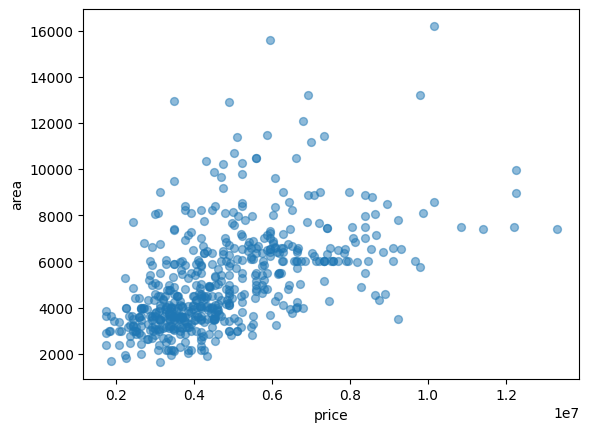

In [11]:
df.plot(kind='scatter', x='price', y='area', s=32,alpha=0.5)

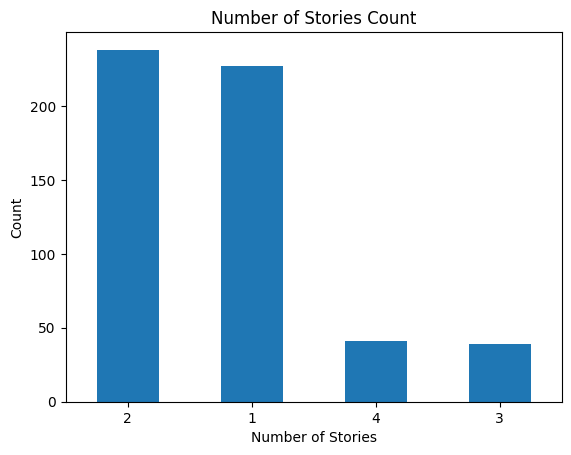

In [18]:
stories_count = df['stories'].value_counts()
stories_count.plot(kind='bar')
plt.title('Number of Stories Count')
plt.xlabel('Number of Stories')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

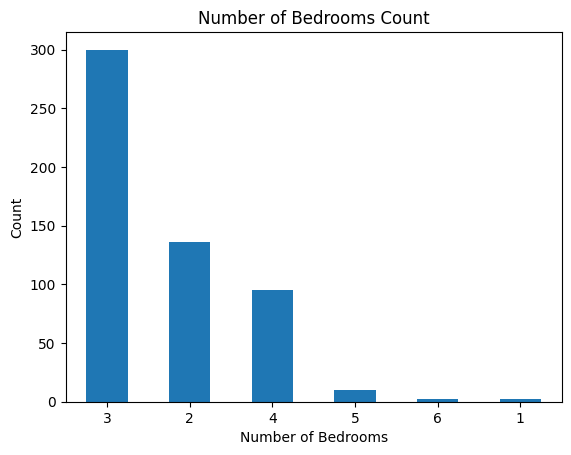

In [19]:
bedrooms_count = df['bedrooms'].value_counts()
bedrooms_count.plot(kind='bar')
plt.title('Number of Bedrooms Count')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

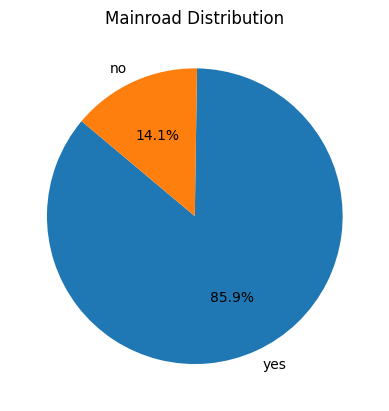

In [20]:
mainroad_count = df['mainroad'].value_counts()
mainroad_count.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Mainroad Distribution')
plt.ylabel('')
plt.show()

In [21]:
x=df.drop(columns=['price'], axis=1)
y=df['price']

In [23]:
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
x = pd.get_dummies(x, columns=categorical_columns, drop_first=True)


In [27]:
scaler= MinMaxScaler()
x=scaler.fit_transform(x)
y=scaler.fit_transform(y.values.reshape(-1,1))


In [28]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [29]:
ln_model= LinearRegression()
ln_model.fit(x_train, y_train)

LinearRegression()

In [30]:
y_pred = ln_model.predict(x_test)

In [38]:
mae= mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 0.08398644189784975


In [45]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Square Error (MSE): {mse}')

Mean Square Error (MSE): 0.013150568297675603


In [46]:
ln_acc=r2_score(y_test, y_pred)
ln_acc

0.6529242642153172